In [1]:
import pandas as pd

df = pd.read_pickle('df_mod_3.pkl')
df.head()

,term,grade,home_ownership,verification_status,purpose,application_type,loan_amnt,int_rate,annual_inc,dti,Emp_Length_Years,Earliest_Cr_Line_Yr,Default
400246,0,1,2,2,1,0,5225.0,11.99,17627.0,29.84,6.0,1994,1
223922,0,1,3,1,1,0,10000.0,13.11,40400.0,18.42,2.0,2004,1
361504,0,4,3,1,2,0,6000.0,22.15,72000.0,15.83,4.0,1993,1
261157,0,4,3,0,2,0,5000.0,18.54,28000.0,16.80,0.0,1959,1
808762,1,5,3,2,2,0,19475.0,23.99,55000.0,34.98,9.0,1989,1


In [2]:
df.shape

(3000, 13)

In [3]:
df.columns.values

array(['term', 'grade', 'home_ownership', 'verification_status',
       'purpose', 'application_type', 'loan_amnt', 'int_rate',
       'annual_inc', 'dti', 'Emp_Length_Years', 'Earliest_Cr_Line_Yr',
       'Default'], dtype=object)

In [4]:
X = df[['term', 'grade', 'home_ownership', 'verification_status',
       'purpose', 'application_type', 'loan_amnt', 'int_rate',
       'annual_inc', 'dti', 'Emp_Length_Years', 'Earliest_Cr_Line_Yr']]

y = df['Default']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [6]:
print(X_train.shape)
print(X_test.shape)

print(len(y_train))
print(len(y_test))

(2400, 12)
(600, 12)
2400
600


In [7]:
# start to fit the LightGBM model

In [8]:
import numpy as np
import pandas as pd
import lightgbm as lgb

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [9]:
df['Default'].value_counts(normalize = True)

0    0.666667
1    0.333333
Name: Default, dtype: float64

In [39]:
# general LightGBM model
# model 1

In [12]:
mod = lgb.LGBMClassifier(num_leaves = 31,
                        random_state = 123)

In [13]:
param_grid = {'learning_rate': [0.01, 0.1, 1],
             'n_estimators': [20, 40]}

In [14]:
grid = GridSearchCV(estimator = mod,
                       param_grid = param_grid,
                   scoring = 'roc_auc',
                   cv = 3,
                   n_jobs = -1,
                   verbose = 1)

In [15]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    5.7s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=123,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.1, 1], 'n_estimators': [20, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [16]:
grid.best_score_

0.6972012713678313

In [17]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 20}

In [19]:
classifier = lgb.LGBMClassifier(random_state = 123,
                              num_leaves = 31,
                              learning_rate = grid.best_params_['learning_rate'],
                              n_estimators = grid.best_params_['n_estimators'])

In [21]:
classifier.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=20,
        n_jobs=-1, num_leaves=31, objective=None, random_state=123,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

In [22]:
y_pred = classifier.predict(X_test)

y_pred_prob = classifier.predict_proba(X_test)

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

import scikitplot as skplt

In [24]:
accuracy_score(y_test, y_pred)

0.6633333333333333

In [25]:
confusion_matrix(y_test, y_pred)

array([[339,  57],
       [145,  59]], dtype=int64)

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


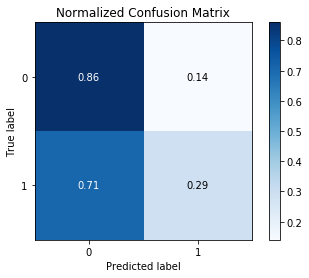

In [26]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize = True)

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


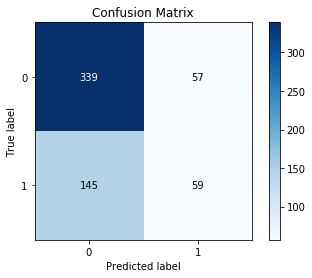

In [27]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [29]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.70      0.86      0.77       396
          1       0.51      0.29      0.37       204

avg / total       0.64      0.66      0.63       600



In [31]:
roc_auc_score(y_test, y_pred)

0.572638146167558

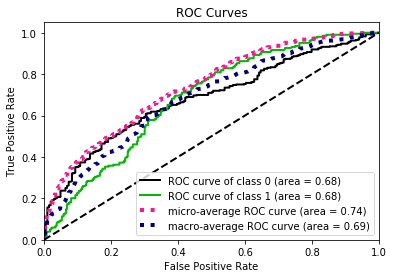

In [33]:
skplt.metrics.plot_roc(y_test, y_pred_prob)

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


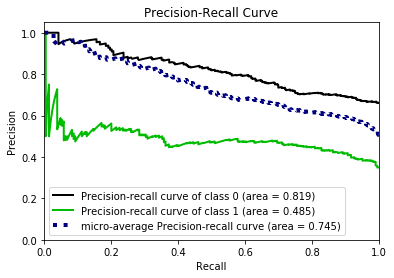

In [34]:
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_prob)

In [35]:
feature_import = pd.DataFrame(data = classifier.feature_importances_, index = X_test.columns.values, columns = ['values'])
feature_import.sort_values(['values'], ascending = False, inplace = True)
feature_import.reset_index(level = 0, inplace = True)

print(feature_import)

                  index  values
0              int_rate     150
1            annual_inc     105
2                   dti      87
3             loan_amnt      71
4   Earliest_Cr_Line_Yr      58
5      Emp_Length_Years      46
6                 grade      23
7   verification_status      23
8        home_ownership      14
9               purpose      12
10                 term      11
11     application_type       0


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5,1,'Variables Imporatnce Plot of LightGBM')

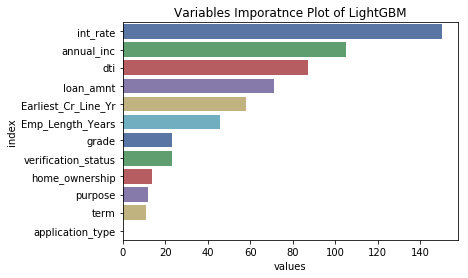

In [37]:
ax = sns.barplot(x = 'values', y = 'index', data = feature_import, palette = 'deep')
ax.set_title('Variables Imporatnce Plot of LightGBM')

In [41]:
# model add hyparameters
# 2nd model

In [43]:
X_train.head()

,term,grade,home_ownership,verification_status,purpose,application_type,loan_amnt,int_rate,annual_inc,dti,Emp_Length_Years,Earliest_Cr_Line_Yr
162874,0,3,3,0,1,0,6000.0,17.77,40000.0,5.61,2.0,2008
212008,0,0,2,2,11,0,9600.0,7.62,60000.0,18.00,1.0,2001
418866,1,3,0,0,2,0,29900.0,17.57,65000.0,21.31,10.0,1999
749680,1,4,3,1,2,0,17250.0,18.25,39221.0,27.66,8.0,2001
46092,0,2,0,2,4,0,7500.0,13.98,60000.0,2.12,10.0,1997


In [44]:
mod2 = lgb.LGBMClassifier(random_state = 123,
                         feature_name = 'auto',
                         categorical_feature = [0,1,2,3,4,5]
                         )

In [45]:
param_grid2 = {'max_depth': [15, 20, 25, 30], 
               'learning_rate': [0.01, 0.1, 0.5],
              'n_estimators': [20, 50, 100]}

In [46]:
grid2 = GridSearchCV(estimator = mod2,
                    param_grid = param_grid2,
                    scoring = 'roc_auc',
                    cv = 3,
                    n_jobs = -1,
                    verbose = 1)

In [47]:
grid2.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   14.5s finished
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:657: UserWarning: feature_name keyword has been found in `params` and will be ignored. Please use feature_name argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:657: UserWarning: categorical_feature keyword has been found in `params` and will be ignored. Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))


GridSearchCV(cv=3, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', categorical_feature=[0, 1, 2, 3, 4, 5],
        class_weight=None, colsample_bytree=1.0, feature_name='auto',
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=123,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [15, 20, 25, 30], 'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [48]:
classifier2 = lgb.LGBMClassifier(random_state = 123,
                                max_depth = grid2.best_params_['max_depth'],
                                learning_rate = grid2.best_params_['learning_rate'],
                                n_estimators = grid2.best_params_['n_estimators'],
                                feature_name = 'auto',
                                categorical_faeutre = [0,1,2,3,4,5])

In [49]:
classifier2.fit(X_train, y_train)

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:657: UserWarning: feature_name keyword has been found in `params` and will be ignored. Please use feature_name argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))


LGBMClassifier(boosting_type='gbdt', categorical_faeutre=[0, 1, 2, 3, 4, 5],
        class_weight=None, colsample_bytree=1.0, feature_name='auto',
        learning_rate=0.1, max_depth=15, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=20,
        n_jobs=-1, num_leaves=31, objective=None, random_state=123,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

In [52]:
y_pred2 = classifier2.predict(X_test)

y_pred_prob_2 = classifier2.predict_proba(X_test)

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

import scikitplot as skplt

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


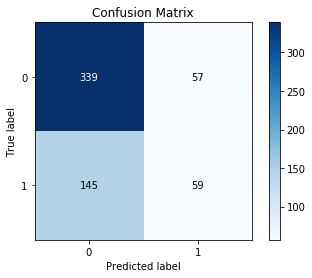

In [54]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred2)

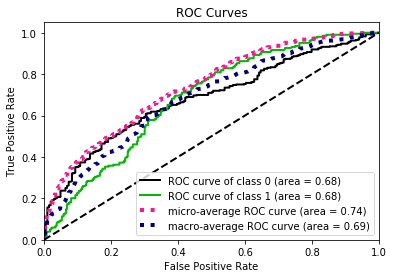

In [55]:
skplt.metrics.plot_roc(y_test, y_pred_prob_2)

C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


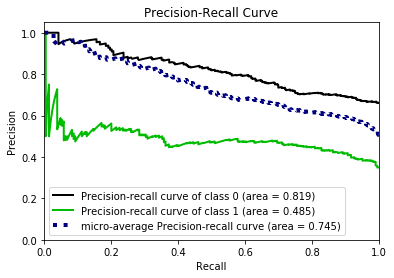

In [56]:
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_prob_2)

In [62]:
X_train.columns.values

array(['term', 'grade', 'home_ownership', 'verification_status',
       'purpose', 'application_type', 'loan_amnt', 'int_rate',
       'annual_inc', 'dti', 'Emp_Length_Years', 'Earliest_Cr_Line_Yr'],
      dtype=object)

In [63]:
mod3 = lgb.LGBMClassifier(random_state = 123,
                         feature_name = X_train.columns.values,
                         categorical_feature = ['term', 'grade', 'home_ownership', 'verification_status', 'purpose', 'application_type']
                         )

In [64]:
param_grid3 = {'max_depth': [15, 20, 25, 30], 
               'learning_rate': [0.01, 0.1, 0.5],
              'n_estimators': [20, 50, 100]}

In [65]:
grid3 = GridSearchCV(estimator = mod3,
                    param_grid = param_grid3,
                    scoring = 'roc_auc',
                    cv = 3,
                    n_jobs = -1,
                    verbose = 1)

In [66]:
grid3.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


JoblibLightGBMError: JoblibLightGBMError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x00000000022B1D20, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\LUY1\AppData\Local\Continuum\anaconda3\...ges\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\L...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x00000000022B1D20, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\LUY1\AppData\Local\Continuum\anaconda3\...ges\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\L...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(608, 1)>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(608, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (608, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=608, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'grid3.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 11, 19, 16, 21, 55, 552731, tzinfo=tzutc()), 'msg_id': 'e20066fd4af144419e6bf5bd03dd8569', 'msg_type': 'execute_request', 'session': 'b87e9196deae4c8a8d77ef6cb528cb6b', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'e20066fd4af144419e6bf5bd03dd8569', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'b87e9196deae4c8a8d77ef6cb528cb6b']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'grid3.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 11, 19, 16, 21, 55, 552731, tzinfo=tzutc()), 'msg_id': 'e20066fd4af144419e6bf5bd03dd8569', 'msg_type': 'execute_request', 'session': 'b87e9196deae4c8a8d77ef6cb528cb6b', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'e20066fd4af144419e6bf5bd03dd8569', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'b87e9196deae4c8a8d77ef6cb528cb6b'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'grid3.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 11, 19, 16, 21, 55, 552731, tzinfo=tzutc()), 'msg_id': 'e20066fd4af144419e6bf5bd03dd8569', 'msg_type': 'execute_request', 'session': 'b87e9196deae4c8a8d77ef6cb528cb6b', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'e20066fd4af144419e6bf5bd03dd8569', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='grid3.fit(X_train, y_train)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'grid3.fit(X_train, y_train)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('grid3.fit(X_train, y_train)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('grid3.fit(X_train, y_train)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='grid3.fit(X_train, y_train)', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'grid3.fit(X_train, y_train)'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='grid3.fit(X_train, y_train)', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-66-dd77558abf20>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at bf6ce80, execution_co...rue silent=False shell_futures=True> result=None>)
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])
   2908                 code = compiler(mod, cell_name, "single")
-> 2909                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000000000C8DD6F0, file "<ipython-input-66-dd77558abf20>", line 1>
        result = <ExecutionResult object at bf6ce80, execution_co...rue silent=False shell_futures=True> result=None>
   2910                     return True
   2911 
   2912             # Flush softspace
   2913             if softspace(sys.stdout, 0):

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000000000C8DD6F0, file "<ipython-input-66-dd77558abf20>", line 1>, result=<ExecutionResult object at bf6ce80, execution_co...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000000000C8DD6F0, file "<ipython-input-66-dd77558abf20>", line 1>
        self.user_global_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import pandas as pd\n\ndf = pd.read_pickle('df_mod_3.pkl')\ndf.head()", 'df.shape', 'df.columns.values', "X = df[['term', 'grade', 'home_ownership', 'veri...ears', 'Earliest_Cr_Line_Yr']]\n\ny = df['Default']", 'from sklearn.model_selection import train_test_s..._split(X, y, test_size = 0.2, random_state = 123)', 'print(X_train.shape)\nprint(X_test.shape)\n\nprint(len(y_train))\nprint(len(y_test))', '# start to fit the LightGBM model', 'import numpy as np\nimport pandas as pd\nimport li...\nfrom sklearn.model_selection import GridSearchCV', "df['Default'].value_counts(normalize = True)", 'mod = lgb.LGBMRegressor(num_leaves = 31)', "param_grid = {'learning_rate': [0.01, 0.1, 1],\n             'n_estimators': [20, 40]}", 'mod = lgb.LGBMClassifier(num_leaves = 31,\n                        random_state = 123)', "param_grid = {'learning_rate': [0.01, 0.1, 1],\n             'n_estimators': [20, 40]}", 'grid = GridSearchCV(estimator = mod,\n           ...     n_jobs = -1,\n                   verbose = 1)', 'grid.fit(X_train, y_train)', 'grid.best_score_', 'grid.best_params_', "classifier = lgb.LGBClassifier(random_state = 12...n_estimators = grid.best_params_['n_estimators'])", "classifier = lgb.LGBMClassifier(random_state = 1...n_estimators = grid.best_params_['n_estimators'])", ...], 'Out': {1:         term  grade  home_ownership  verificatio...              9.0                 1989        1  , 2: (3000, 13), 3: array(['term', 'grade', 'home_ownership', 'verif...est_Cr_Line_Yr',
       'Default'], dtype=object), 9: 0    0.666667
1    0.333333
Name: Default, dtype: float64, 15: GridSearchCV(cv=3, error_score='raise',
       e...core='warn',
       scoring='roc_auc', verbose=1), 16: 0.6972012713678313, 17: {'learning_rate': 0.1, 'n_estimators': 20}, 21: LGBMClassifier(boosting_type='gbdt', class_weigh...      subsample_for_bin=200000, subsample_freq=1), 24: 0.6633333333333333, 25: array([[339,  57],
       [145,  59]], dtype=int64), ...}, 'X':         term  grade  home_ownership  verificatio...                 1993  

[3000 rows x 12 columns], 'X_test':         term  grade  home_ownership  verificatio...0                 2000  

[600 rows x 12 columns], 'X_train':         term  grade  home_ownership  verificatio...                 2007  

[2400 rows x 12 columns], '_': array(['term', 'grade', 'home_ownership', 'verif...ars', 'Earliest_Cr_Line_Yr'],
      dtype=object), '_1':         term  grade  home_ownership  verificatio...              9.0                 1989        1  , '_15': GridSearchCV(cv=3, error_score='raise',
       e...core='warn',
       scoring='roc_auc', verbose=1), '_16': 0.6972012713678313, ...}
        self.user_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import pandas as pd\n\ndf = pd.read_pickle('df_mod_3.pkl')\ndf.head()", 'df.shape', 'df.columns.values', "X = df[['term', 'grade', 'home_ownership', 'veri...ears', 'Earliest_Cr_Line_Yr']]\n\ny = df['Default']", 'from sklearn.model_selection import train_test_s..._split(X, y, test_size = 0.2, random_state = 123)', 'print(X_train.shape)\nprint(X_test.shape)\n\nprint(len(y_train))\nprint(len(y_test))', '# start to fit the LightGBM model', 'import numpy as np\nimport pandas as pd\nimport li...\nfrom sklearn.model_selection import GridSearchCV', "df['Default'].value_counts(normalize = True)", 'mod = lgb.LGBMRegressor(num_leaves = 31)', "param_grid = {'learning_rate': [0.01, 0.1, 1],\n             'n_estimators': [20, 40]}", 'mod = lgb.LGBMClassifier(num_leaves = 31,\n                        random_state = 123)', "param_grid = {'learning_rate': [0.01, 0.1, 1],\n             'n_estimators': [20, 40]}", 'grid = GridSearchCV(estimator = mod,\n           ...     n_jobs = -1,\n                   verbose = 1)', 'grid.fit(X_train, y_train)', 'grid.best_score_', 'grid.best_params_', "classifier = lgb.LGBClassifier(random_state = 12...n_estimators = grid.best_params_['n_estimators'])", "classifier = lgb.LGBMClassifier(random_state = 1...n_estimators = grid.best_params_['n_estimators'])", ...], 'Out': {1:         term  grade  home_ownership  verificatio...              9.0                 1989        1  , 2: (3000, 13), 3: array(['term', 'grade', 'home_ownership', 'verif...est_Cr_Line_Yr',
       'Default'], dtype=object), 9: 0    0.666667
1    0.333333
Name: Default, dtype: float64, 15: GridSearchCV(cv=3, error_score='raise',
       e...core='warn',
       scoring='roc_auc', verbose=1), 16: 0.6972012713678313, 17: {'learning_rate': 0.1, 'n_estimators': 20}, 21: LGBMClassifier(boosting_type='gbdt', class_weigh...      subsample_for_bin=200000, subsample_freq=1), 24: 0.6633333333333333, 25: array([[339,  57],
       [145,  59]], dtype=int64), ...}, 'X':         term  grade  home_ownership  verificatio...                 1993  

[3000 rows x 12 columns], 'X_test':         term  grade  home_ownership  verificatio...0                 2000  

[600 rows x 12 columns], 'X_train':         term  grade  home_ownership  verificatio...                 2007  

[2400 rows x 12 columns], '_': array(['term', 'grade', 'home_ownership', 'verif...ars', 'Earliest_Cr_Line_Yr'],
      dtype=object), '_1':         term  grade  home_ownership  verificatio...              9.0                 1989        1  , '_15': GridSearchCV(cv=3, error_score='raise',
       e...core='warn',
       scoring='roc_auc', verbose=1), '_16': 0.6972012713678313, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
C:\Users\LUY1\Desktop\testing dataset\classification\<ipython-input-66-dd77558abf20> in <module>()
----> 1 grid3.fit(X_train, y_train)

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=3, error_score='raise',
       e...core='warn',
       scoring='roc_auc', verbose=1), X=        term  grade  home_ownership  verificatio...                 2007  

[2400 rows x 12 columns], y=162874    1
212008    1
418866    0
749680    0
...41    0
Name: Default, Length: 2400, dtype: int64, groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=3, random_state=None, shuffle=False)>
        X =         term  grade  home_ownership  verificatio...                 2007  

[2400 rows x 12 columns]
        y = 162874    1
212008    1
418866    0
749680    0
...41    0
Name: Default, Length: 2400, dtype: int64
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
LightGBMError                                      Mon Nov 19 16:21:57 2018
PID: 15064Python 3.6.5: C:\Users\LUY1\AppData\Local\Continuum\anaconda3\python.exe
...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (LGBMClassifier(boosting_type='gbdt',
        cat...      subsample_for_bin=200000, subsample_freq=1),         term  grade         ...           Emp_Le....0                 2007

[2400 rows x 12 columns], 162874    1
212008    1
418866    0
749680    0
...41    0
Name: Default, Length: 2400, dtype: int64, {'score': make_scorer(roc_auc_score, needs_threshold=True)}, array([ 785,  787,  790, ..., 2397, 2398, 2399]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...,
       802, 804, 807, 808, 812, 813, 814, 815]), 1, {'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 20}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (LGBMClassifier(boosting_type='gbdt',
        cat...      subsample_for_bin=200000, subsample_freq=1),         term  grade         ...           Emp_Le....0                 2007

[2400 rows x 12 columns], 162874    1
212008    1
418866    0
749680    0
...41    0
Name: Default, Length: 2400, dtype: int64, {'score': make_scorer(roc_auc_score, needs_threshold=True)}, array([ 785,  787,  790, ..., 2397, 2398, 2399]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...,
       802, 804, 807, 808, 812, 813, 814, 815]), 1, {'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 20})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=LGBMClassifier(boosting_type='gbdt',
        cat...      subsample_for_bin=200000, subsample_freq=1), X=        term  grade         ...           Emp_Le....0                 2007

[2400 rows x 12 columns], y=162874    1
212008    1
418866    0
749680    0
...41    0
Name: Default, Length: 2400, dtype: int64, scorer={'score': make_scorer(roc_auc_score, needs_threshold=True)}, train=array([ 785,  787,  790, ..., 2397, 2398, 2399]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ...,
       802, 804, 807, 808, 812, 813, 814, 815]), verbose=1, parameters={'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 20}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method LGBMClassifier.fit of LGBMClassifi...     subsample_for_bin=200000, subsample_freq=1)>
        X_train =         term  grade         ...           Emp_Le....0                 2007

[1599 rows x 12 columns]
        y_train = 50476     1
197627    1
458783    1
721903    1
...41    0
Name: Default, Length: 1599, dtype: int64
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\sklearn.py in fit(self=LGBMClassifier(boosting_type='gbdt',
        cat...      subsample_for_bin=200000, subsample_freq=1), X=        term  grade         ...           Emp_Le....0                 2007

[1599 rows x 12 columns], y=50476     1
197627    1
458783    1
721903    1
...41    0
Name: Default, Length: 1599, dtype: int64, sample_weight=None, init_score=None, eval_set=None, eval_names=None, eval_sample_weight=None, eval_class_weight=None, eval_init_score=None, eval_metric='binary_logloss', early_stopping_rounds=None, verbose=True, feature_name='auto', categorical_feature='auto', callbacks=None)
    670                                         eval_init_score=eval_init_score,
    671                                         eval_metric=eval_metric,
    672                                         early_stopping_rounds=early_stopping_rounds,
    673                                         verbose=verbose, feature_name=feature_name,
    674                                         categorical_feature=categorical_feature,
--> 675                                         callbacks=callbacks)
        callbacks = None
    676         return self
    677 
    678     base_doc = LGBMModel.fit.__doc__
    679     fit.__doc__ = (base_doc[:base_doc.find('eval_metric :')] +

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\sklearn.py in fit(self=LGBMClassifier(boosting_type='gbdt',
        cat...      subsample_for_bin=200000, subsample_freq=1), X=        term  grade         ...           Emp_Le....0                 2007

[1599 rows x 12 columns], y=array([1, 1, 1, ..., 0, 0, 0], dtype=int64), sample_weight=None, init_score=None, group=None, eval_set=None, eval_names=None, eval_sample_weight=None, eval_class_weight=None, eval_init_score=None, eval_group=None, eval_metric='binary_logloss', early_stopping_rounds=None, verbose=True, feature_name='auto', categorical_feature='auto', callbacks=None)
    464                               self.n_estimators, valid_sets=valid_sets, valid_names=eval_names,
    465                               early_stopping_rounds=early_stopping_rounds,
    466                               evals_result=evals_result, fobj=self._fobj, feval=feval,
    467                               verbose_eval=verbose, feature_name=feature_name,
    468                               categorical_feature=categorical_feature,
--> 469                               callbacks=callbacks)
        callbacks = None
    470 
    471         if evals_result:
    472             self._evals_result = evals_result
    473 

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py in train(params={'boosting_type': 'gbdt', 'categorical_feature': ['term', 'grade', 'home_ownership', 'verification_status', 'purpose', 'application_type'], 'colsample_bytree': 1.0, 'feature_name': array(['term', 'grade', 'home_ownership', 'verif...ars', 'Earliest_Cr_Line_Yr'],
      dtype=object), 'learning_rate': 0.01, 'max_depth': 15, 'metric': 'binary_logloss', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, ...}, train_set=<lightgbm.basic.Dataset object>, num_boost_round=20, valid_sets=[], valid_names=None, fobj=None, feval=None, init_model=None, feature_name='auto', categorical_feature='auto', early_stopping_rounds=None, evals_result={}, verbose_eval=True, learning_rates=None, keep_training_booster=False, callbacks={<function print_evaluation.<locals>.callback>, <function record_evaluation.<locals>.callback>})
    175     callbacks_before_iter = sorted(callbacks_before_iter, key=attrgetter('order'))
    176     callbacks_after_iter = sorted(callbacks_after_iter, key=attrgetter('order'))
    177 
    178     # construct booster
    179     try:
--> 180         booster = Booster(params=params, train_set=train_set)
        booster = undefined
        params = {'boosting_type': 'gbdt', 'categorical_feature': ['term', 'grade', 'home_ownership', 'verification_status', 'purpose', 'application_type'], 'colsample_bytree': 1.0, 'feature_name': array(['term', 'grade', 'home_ownership', 'verif...ars', 'Earliest_Cr_Line_Yr'],
      dtype=object), 'learning_rate': 0.01, 'max_depth': 15, 'metric': 'binary_logloss', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, ...}
        train_set = <lightgbm.basic.Dataset object>
    181         if is_valid_contain_train:
    182             booster.set_train_data_name(train_data_name)
    183         for valid_set, name_valid_set in zip(reduced_valid_sets, name_valid_sets):
    184             booster.add_valid(valid_set, name_valid_set)

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py in __init__(self=<lightgbm.basic.Booster object>, params={'boosting_type': 'gbdt', 'categorical_feature': ['term', 'grade', 'home_ownership', 'verification_status', 'purpose', 'application_type'], 'colsample_bytree': 1.0, 'feature_name': array(['term', 'grade', 'home_ownership', 'verif...ars', 'Earliest_Cr_Line_Yr'],
      dtype=object), 'learning_rate': 0.01, 'max_depth': 15, 'metric': 'binary_logloss', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, ...}, train_set=<lightgbm.basic.Dataset object>, model_file=None, silent=False)
   1298                 raise TypeError('Training data should be Dataset instance, met {}'.format(type(train_set).__name__))
   1299             params_str = param_dict_to_str(params)
   1300             # construct booster object
   1301             self.handle = ctypes.c_void_p()
   1302             _safe_call(_LIB.LGBM_BoosterCreate(
-> 1303                 train_set.construct().handle,
        train_set.construct.handle = undefined
   1304                 c_str(params_str),
   1305                 ctypes.byref(self.handle)))
   1306             # save reference to data
   1307             self.train_set = train_set

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py in construct(self=<lightgbm.basic.Dataset object>)
    851             else:
    852                 # create train
    853                 self._lazy_init(self.data, label=self.label,
    854                                 weight=self.weight, group=self.group, init_score=self.init_score,
    855                                 predictor=self._predictor, silent=self.silent, feature_name=self.feature_name,
--> 856                                 categorical_feature=self.categorical_feature, params=self.params)
        self.categorical_feature = 'auto'
        self.params = {'boosting_type': 'gbdt', 'categorical_feature': ['term', 'grade', 'home_ownership', 'verification_status', 'purpose', 'application_type'], 'colsample_bytree': 1.0, 'feature_name': array(['term', 'grade', 'home_ownership', 'verif...ars', 'Earliest_Cr_Line_Yr'],
      dtype=object), 'learning_rate': 0.01, 'max_depth': 15, 'metric': 'binary_logloss', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, ...}
    857             if self.free_raw_data:
    858                 self.data = None
    859         return self
    860 

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py in _lazy_init(self=<lightgbm.basic.Dataset object>, data=array([[1.000e+00, 3.000e+00, 0.000e+00, ..., 3...., ..., 1.315e+01, 5.000e+00,
        2.007e+03]]), label=array([1, 1, 1, ..., 0, 0, 0], dtype=int64), reference=None, weight=None, group=None, init_score=None, predictor=None, silent=False, feature_name=['term', 'grade', 'home_ownership', 'verification_status', 'purpose', 'application_type', 'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'Emp_Length_Years', 'Earliest_Cr_Line_Yr'], categorical_feature=[], params={'boosting_type': 'gbdt', 'categorical_feature': ['term', 'grade', 'home_ownership', 'verification_status', 'purpose', 'application_type'], 'colsample_bytree': 1.0, 'feature_name': array(['term', 'grade', 'home_ownership', 'verif...ars', 'Earliest_Cr_Line_Yr'],
      dtype=object), 'learning_rate': 0.01, 'max_depth': 15, 'metric': 'binary_logloss', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, ...})
    705         elif isinstance(data, scipy.sparse.csr_matrix):
    706             self.__init_from_csr(data, params_str, ref_dataset)
    707         elif isinstance(data, scipy.sparse.csc_matrix):
    708             self.__init_from_csc(data, params_str, ref_dataset)
    709         elif isinstance(data, np.ndarray):
--> 710             self.__init_from_np2d(data, params_str, ref_dataset)
        self.__init_from_np2d = undefined
        data = array([[1.000e+00, 3.000e+00, 0.000e+00, ..., 3...., ..., 1.315e+01, 5.000e+00,
        2.007e+03]])
        params_str = 'boosting_type=gbdt colsample_bytree=1.0 learning...ed=123 nthread=-1 verbose=0 metric=binary_logloss'
        ref_dataset = None
    711         else:
    712             try:
    713                 csr = scipy.sparse.csr_matrix(data)
    714                 self.__init_from_csr(csr, params_str, ref_dataset)

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py in __init_from_np2d(self=<lightgbm.basic.Dataset object>, mat=array([[1.000e+00, 3.000e+00, 0.000e+00, ..., 3...., ..., 1.315e+01, 5.000e+00,
        2.007e+03]]), params_str='boosting_type=gbdt colsample_bytree=1.0 learning...ed=123 nthread=-1 verbose=0 metric=binary_logloss', ref_dataset=None)
    767             ctypes.c_int(mat.shape[0]),
    768             ctypes.c_int(mat.shape[1]),
    769             ctypes.c_int(C_API_IS_ROW_MAJOR),
    770             c_str(params_str),
    771             ref_dataset,
--> 772             ctypes.byref(self.handle)))
        self.handle = c_void_p(None)
    773 
    774     def __init_from_csr(self, csr, params_str, ref_dataset):
    775         """
    776         Initialize data from a CSR matrix.

...........................................................................
C:\Users\LUY1\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py in _safe_call(ret=-1)
     43     ----------
     44     ret : int
     45         return value from API calls
     46     """
     47     if ret != 0:
---> 48         raise LightGBMError(_LIB.LGBM_GetLastError())
     49 
     50 
     51 def is_numeric(obj):
     52     """Check is a number or not, include numpy number etc."""

LightGBMError: b'categorical_column is not a number,                         if you want to use a column name,                         please add the prefix "name:" to the column name'
___________________________________________________________________________